In [226]:
from mne.io import read_raw_eeglab, read_raw
from mne.channels import get_builtin_montages, make_standard_montage
from mne import events_from_annotations, Epochs
import PIL
raw = None
mne.set_log_level(False)
raw = read_raw_eeglab("../sub400/400MNE.set")
raw = raw.crop(tmin=60, tmax=60+5*60)
raw.set_channel_types({"BIP1":"eog","BIP2":"misc","BIP3":"misc","BIP4":"misc", "AUX1":"misc","AUX2":"misc","AUX3":"misc","AUX4":"misc", "M1":"misc", "M2":"misc"})
raw.set_montage(make_standard_montage("standard_1020"))

/tmp/ipykernel_4429/3725935489.py:7: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab("../sub400/400MNE.set")
/tmp/ipykernel_4429/3725935489.py:9: RuntimeWarning: The unit for channel(s) AUX1, AUX2, AUX3, AUX4, BIP2, BIP3, BIP4, M1, M2 has changed from V to NA.
  raw.set_channel_types({"BIP1":"eog","BIP2":"misc","BIP3":"misc","BIP4":"misc", "AUX1":"misc","AUX2":"misc","AUX3":"misc","AUX4":"misc", "M1":"misc", "M2":"misc"})
/tmp/ipykernel_4429/3725935489.py:10: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['M1', 'M2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(make_standard_montage("standard_1020"))


<RawEEGLAB | 400MNE.fdt, 72 x 307201 (300.0 s), ~82 kB, data not loaded>

In [58]:
import matplotlib.pyplot as plt
from ipywidgets import Textarea, Text, Label, Button, VBox, HBox, HTML, Image, Tab, Output, Layout, FloatSlider
from IPython.display import display, clear_output
import numpy as np
import markdown

In [2]:
def get_answer_to_reveal(text, answer, with_input_field=False):
    test_reveal_button = Button(description="Check answer")
    
    test_answer = HTML(answer)
    test_answer.layout.visibility="hidden"
    def show_answer(b):
        test_answer.layout.visibility="visible"
    test_reveal_button.on_click(show_answer)
    layout = Layout(width="50%", border="solid purple")
    if with_input_field:
        elements = VBox([HTML(text), HBox([Text(), test_reveal_button]), test_answer], layout=layout)
    else:
        elements = VBox([HTML(text), HBox([test_reveal_button]), test_answer], layout=layout)
    return elements
    
def get_chapter(panels, panel_titles):
    tab = Tab()
    tab.children = panels
    tab.titles = panel_titles
    chapter = tab
    return chapter

In [3]:
def code_block(code):
    text = f"""
    <style>
      pre {{
        background-color: #f5f5f5;
        padding: 10px;
        border-radius: 5px;
        overflow-x: auto;
      }}
      code {{
        font-family: monospace;
        color: #333;
    }}
    </style>
    <pre><code>
    {code}
    </code></pre>
    """
    return text


In [4]:
def check_data(d):
    ch_names = d.ch_names
    assert type(ch_names) == list and len(ch_names) > 0
    assert raw.n_times > 60
    

In [214]:
# Function to display the selected figure

def get_figure_selector(figures, headline=None):
    output = Output()
    buttons = [Button(description=str(i)) for i in range(len(figures))]
    
    def show_figure(fig_index):
        # Clear the previous output
        output.clear_output(wait=True)
        with output:
            display(figures[fig_index])
    
    # Define what happens when a button is clicked
    def on_button_click(b):
        fig_index = int(b.description)
        show_figure(fig_index)
    
    # Attach the click event to each button
    for button in buttons:
        button.on_click(on_button_click)
    
    # Display the buttons and the output area
    button_box = HBox(buttons)
    if headline:
        heading = HTML(f"""<h2>{headline}</h2>""")
    else:
        heading = HTML("")
    
    panel = VBox([heading, button_box, output])
    return panel

# Start

In [8]:
raw = None

text = """
Welcome! 
This tutorial has two purposes
<br>
<b>First</b>, it teaches you to work with EEG data with explanations and visualizations. 
<br>
<b>Second</b>, it allows you to explore your own data along the explanations, to directly apply your new knowledge. This tutorial can best be used, if you have an EEG dataset at hand. 
If you have one, you will read the data in the following. You don't need to know anything about the data yet. You will learn it during this course. 
If you don't have any dataset, you can still continue with the tutorial. You will be missing some interactions and tests, but you can still read all the texts and learn. 

"""
panel_1 = HTML(text)

text = """
Do you have an EEG dataset?
"""
output = Output()
output_2 = Output()
yes_button = Button(description="yes")
no_button = Button(description="No")
def no(b):
    text = "Okay. Just continue with the next panel."
    with output:
        display(HTML(text))
        
def read_data(path):
    global raw
    raw = read_raw(path)
    raw = raw.crop(tmin=60, tmax=60+5*60)
    raw.set_channel_types({"BIP1":"eog","BIP2":"misc","BIP3":"misc","BIP4":"misc", "AUX1":"misc","AUX2":"misc","AUX3":"misc","AUX4":"misc", "M1":"misc", "M2":"misc"})


def yes(b):
    input_text = Text()

    def display_read_data(b):
        path = input_text.value
        try:
            read_data(path)
            try:
                check_data_plausibility(raw)
            except AssertionError as e:
                with output_2:
                    clear_output()
                    display(HTML("The data has been read, but it does not look plausible. Are you sure that this is the correct file? You can continue with it, but it might fail at a later stage."))
            with output_2:
                clear_output()
                display(HTML("The file has been read succesfully. You can continue!"))
        except Exception as e:
            with output_2:
                clear_output()
                display(HTML("There was a problem with this file: <br>" + str(e)))
    
    text = "Great! Past the path to your datafile here:"
    read_in_button = Button(description="Read Data")
    read_in_button.on_click(display_read_data)
    
    with output:
        clear_output()
        display(VBox([HTML(text), input_text, read_in_button]))
    
no_button.on_click(no)
yes_button.on_click(yes)
panel_2 = VBox([HTML(text), HBox([yes_button, no_button]), output, output_2])


code = code_block("""
x = mne.call_function(x)
""")
text = f"""
Within this course, we will use a python-library called MNE-python from time to time. 
MNE-python provides lots of functions you can use to work with EEG data. 
When we use some code from MNE, it will be displayed like this: 
{code}

This is not a full tutorial on MNE though. If you want to learn more about MNE, you can browse their tutorials by clicking <a href="https://mne.tools/stable/documentation/index.html"><u>here</u></a>.
If you don't care about coding and using MNE, you can also ignore the code examples. You will still be able to understand what is happening.
"""

panel_3 = HTML(text)

text = """
The course is structured as follows:
<ul>
<li>Chapters (1) and (2) explain how an EEG works and how the data recorded with an EEG looks like. </li>
<li>Chapters (3) to (5) go into more detail an how periodic signals can be described and analyzed in general. These chapter are not EEG-specific. </li>
<li>Chapter (6) describes the EEG signal using the learnings from (3) to (5). </li>
<li> Chapter (7) introduces the power spectrum, which is a more sophisticated way to analyze and understand EEG data.</li>
</ul>
"""
panel_4 = HTML(text)

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4], ["1","2","3", "4"])
display(chapter) #../sub400/400MNE.set

# (1) What is an EEG?

In [117]:
text = """
What is an EEG at all? EEG stands for Electroencephalography. "Encephalon" is the greek word for brain and "graphein" means writing. 
Accordingly, an EEG is a device that writes electric brain signals.
You may already know, that the brain sends electric signals along the neurons' axons. 
There are plenty of neurons and they send many tiny signals per second. 
If researchers want to measure these signals on the basis of single neurons, they cut open the head and implement tiny measurement tools. 
This is done in animals most often, because human's don't want their head to be cut open. 
The EEG however, doesn't need any operation beforehand, which is why we call it a <b>non-invasive method</b>. 
You can easily imagine that this makes it much more accessible for research. 
You just need to place an eeg cap on the participants head that looks like this:
"""
im_eeg_hood = Image(value=open("resources/EEG_cap.jpg", "rb").read(),width=200,height=250)
panel_1 = VBox([HTML(text), im_eeg_hood])


text = """
I already mentioned, that the EEG measures electric signals of neurons, and it does that from outside of the skull. 
If a single neurons sends an electric signal, we would never be able to record this from the outside of the skull, though, because it would be way too small. 
However, if many neurons send electric signals at the same time, they sum up and this can be measured from the outside with sensitive electrodes. 
This is what the EEG does. 
It is important to understand, that the EEG doesn't record <i>all</i> the brain activity but just the very strong highlights. 
<br>
Imagine you are standing outside of a soccer arena. 
You don't see the game, you just hear the fans' voices. 
Would you be able to understand everyting that happens within the game?
Most likely not. But you would be able to recognize major events like a scored goal, because here all fan's (or half of them) cheer altogether. 
Transferred to the brain, these are the kinds of signals an EEG measures. 
"""
panel_2 = HTML(text)

text = """
On the picture shown before you may have recognized, that an EEG cap includes multiple electrodes at different locations. 
The brain has a very sophisticated structure and different parts of it are responsible for different functions. 
For example (and strongly simplified), the back part of the prain (the so-called occpital region) is associated with processing visual information, while the frontal part is responsible for deliberate and conscious thought. 
Due to that structure, it makes sense to place electrodes at different locations on the skull to measure these differences. 
<br>
Additionally, multiple electrodes allow to measure a signal more reliably. 
In science it is common to use many measurements and aggregate them to get a more robust picture of what is happening. 
If you were to determine the depth of the ocean you also would perform multiple measurements at different locations, wouldn't you?
"""
panel_3 = HTML(text)

text = """
How many electrodes does an EEG have at all and where exactly are they located? 
There is not <i>the one and only</i> eeg cap, but there are different standards on the number and location of electrodes. 
The format used most often is known as 10-20-system. In the following you see a visualization of the electrodes.
"""
im_10_20 = Image(value=open("resources/10_20.png", "rb").read(),width=400,height=600)
text_2 = """
Do you see the nose at the top (Nasion) and the ears to the left and right? The person in the image looks upwards and you look at their head from above. 
You see that the electrodes all have names like NZ, PO3 or P9. 
When you look at the data later, you want to know which electrode captures which signal, and this is why you want to be familiar with the naming scheme.
The first letter(s) indicate the region of the brain the electrode is placed on: pre-frontal (Fp), frontal (F), temporal (T), parietal (P), occipital (O) and central (C). 
This indicates the position on the axis from nose to back of the head. 
On top of that, there is information on the location of the axis from ear to ear. 
Electrodes with a "Z" are placed in the middle of the brain. 
Electrodes with even numbers are placed on the right part of the head, while electrodes with uneven numbers are on the left part. 
For example, FZ is frontal and in the middle. P4 is parietal and on the right part. C3 is central and on the left part of the brain. 
You also see two electrodes "A1" and "A2" placed behind the ear. Sometimes they are also called "M1" and "M2" instead. 
In some picture there are also two points NZ and IZ. These are <b>not</b> electrodes, but just points of reference, that are used, when the EEG cap is placed on a person's skull. 
While they may appear on such visualizations, you will never find EEG data recorded from electrodes called NZ or IZ. 
"""
panel_4 = VBox([HTML(text), im_10_20, HTML(text_2)])

text = """
The 10-20 system we just saw had 21 electrodes in total. 
However, sometimes you don't need that much, or you need even more. Hence, different standards exist with a different numbers of electrodes. 
Often you may see the 10-10 system, which is an extension of the 10-20 system. If you observe it carefully, you will see that it includes all the electrodes of the 10-20 system, extended by some more:
"""
im_10_10 = Image(value=open("resources/10_10.png", "rb").read(),width=400,height=600)

text_2 = """
Other EEG caps may use less electrodes like the 14 ones here:
"""
im_14 = Image(value=open("resources/14_channel_eeg.png", "rb").read(),width=400,height=600)

text_3 = """
When working with EEGs, it is important to decide on the number of electrodes before, depending on the equipment available and the researchs' demands. 
Even more important is to know which system has been used when interpreting the data, though. 
When you analyze EEG signals (as we will do in this tutorial later), you need to know how many electrodes recorded them and where exactly these electrodes have been placed. 
"""
panel_5 = VBox([HTML(text), im_10_10, HTML(text_2), im_14, HTML(text_3)])

montages = get_builtin_montages()
montages = "".join([f"<li>{x}</li>" for x in montages])
channels = np.random.choice(raw.ch_names, size=min(6, len(raw.ch_names)))
code = code_block("""
raw.set_montage(make_standard_montage("standard_1020"))
raw.plot_sensors(ch_type="eeg")
""")
text = f"""
MNE comes with a list of builtin channel systems (also called <br>montages</b>) that are the following:
<br>
<ul>
{montages}
 </ul>
<br>
Let's assume your data is missing the information on which system has been used exactly. However, you still have the channel names and from these, the system may be inferred. 
Here are some channels of your data:
{channels}
Can you already guess, which system has been used?
MNE also provides a function to apply a selected montage to a dataset. 
{code}
Try it with one of the montages listed above!
Can you find the right montage for your data?
What happens, if you use a montage that doesn't fit? 
"""
text_input = Text()
def try_out_montage(name=None):
    if name is None:
        name = text_input.value
    try:
        x = raw.copy()
        x.set_montage(make_standard_montage(name))
        t = "This was sucesfull! This is where the electrodes are located on the skull:"
        return [HTML(t), x.plot_sensors(ch_type="eeg", show=False)]
    except Exception as e:
        t = "Oh no, there was en error! Do you understand the error message? What was the problem?"
        return (HTML(t),str(e))
output = Output()
def display_montage(b):
    t, montage_or_error = try_out_montage()
    with output:
        clear_output()
        display(t,montage_or_error)
button = Button(description="Apply Montage")
button.on_click(display_montage)

panel_6 = VBox([HTML(text), text_input, button, output])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, panel_5, panel_6], ["1","2","3","4", "5", "Try it yourself!"])
display(chapter)

# (2) EEG Data

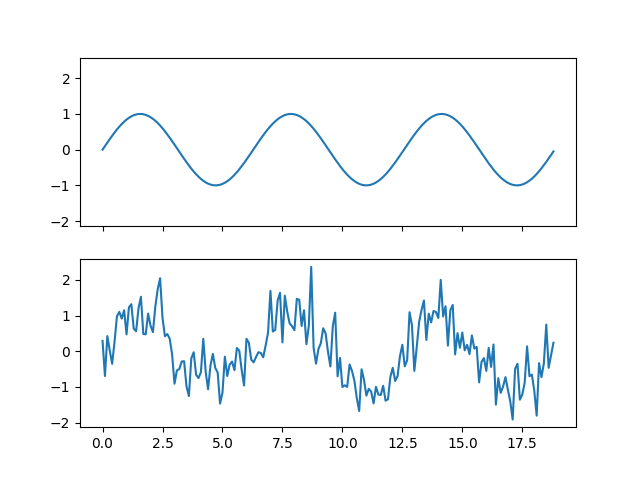

In [126]:
%matplotlib inline
%matplotlib widget

text = """
Now that we know what an EEG measures, it is time to take a look at the data it collects. 
Most of the time, you will see the data being displayed like this: 
"""

im_eeg = Image(value=open("resources/eeg_raw_signal.png", "rb").read(),width=400,height=600)

text_2 = """
First of all, you see multiple lines of data here. 
These are called <b>channels</b> and corespond to the different electordes you are already familiar with. 
You see the electrode/channel names on the left.
You also see, that the data is ploted over time on the x-axis. 
With an eeg, you don't just record brain activity at a given point in time, but you record it over a longer time. 

The y-axis displays the power of the electric activity. 
Electric voltage is measured in Volt. 
However, as the brain uses rather low voltages (compared to the electric current coming out of your power socket), eeg data will typically be displayed in μV (micro-volt, i.e. 10⁻⁶ volt).
"""

panel_1 = VBox([HTML(text), im_eeg, HTML(text_2)])


text = """
One thing to be aware of when working with EEG data is the fact, that this data is very noisy. What exactly does that mean? 
Take a look at the picture below. It is quite hard to recognize anything in it, right? 
That is because many pixels with random colors have been added to the original image. That is noise. 
However, observe what happens when you reduce the noise by dragging the slider to the left. Can you recognize the image now and tell, what it shows?

"""
def add_gaussian_noise(image_array, mean=0, std=250):
    # Generate Gaussian noise
    gauss = np.random.normal(mean, std, image_array.shape)
    noisy_image = image_array + gauss
    
    # Clip values to stay in valid range (0, 255)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    return noisy_image
    
output2 = Output()
image_otter = PIL.Image.open('resources/otter.jpg').convert('RGB')
image_array = np.array(image_otter)
noise_slider = FloatSlider(min=0, max=500, value=500, readout=False, continous_update=False)
def on_value_change(change):
    #with output2:
    #    print(change)
    noisy_image_array = add_gaussian_noise(image_array, std=noise_slider.value)
    noisy_image = PIL.Image.fromarray(noisy_image_array)
    with output2:
        clear_output()
        display(noisy_image)
        
on_value_change(None)      
noise_slider.observe(on_value_change, names="value")
panel_2 = VBox([HTML(text),noise_slider, output2])

text = """
In the previous tab you saw, that noise can make it hard to recognize an image. 
However, noise can also be applied to different kinds of data. For example, noise in a sound recording can make it hard to hear what a person is saying.
Likewise, eeg data, which is electric voltage over time can become noisy, as you see in the following. 
The first plot is a pure signal, the second plot is the same signal but with some noise added on top. 
"""



text_2= """Do you see the first curve hidden in the second?
<br>
In general, we say that <b>noise</b> superimposes a <b>signal</b>.
The signal is always the data you <b>want</b> to measure, while the noise is everything else that distorts it. 
In the previous tab, the image of the otter was the signal and in the above figure, the first curve is the signal.
In an EEG, brain activity is the signal we are interested in and everything else we measure, that is not coming from the brain, is noise. 
For example, muscle movements also procude electric activity that may be recorded by the EEG. 
<br>
However, you don't need to be completely noise-free all the time. With a little noise you still had been able to recognize the image, right? 
If the data is too noisy, we may not be able to detect the actual signal, but we can afford having some noise. If the signal is strong enough, it will still be visible through the noise.
In a later chapter, we will see how certain kinds of noise can be filtered from the data to make the signal shine through. 
"""

x = np.arange(0, 6*np.pi, 0.1)
y = np.sin(x)
fig,axs = plt.subplots(2,sharey=True, sharex=True)
axs[0].plot(x,y)
axs[1].plot(x, y+np.random.normal(0, 0.5, len(x)))
output3 = Output()
with output3:

    display(fig)

panel_3 = VBox([HTML(text), output3, HTML(text_2)])

text = """This is how your data looks like.
Note that you can interact with this visualization. You can click on the bars on the x and y axis to jump to different points in time or different channels.
Do the signals differ between the channels? Are there channels that stand out in particular?
Can you use your knowledge about the electrodes' locations to explain some of these differences?"""


output = Output()
with output:
    raw.plot(n_channels=4)

panel_4 = VBox([HTML(text), output])



chapter = get_chapter([panel_1, panel_2, panel_3, panel_4], ["1","2","3", "Try it yourself!"])
display(chapter)


# (3) What is a periodic signal?

In [125]:
%matplotlib inline
width, height = 600, 800

im_string_moving = Image(value=open("resources/string_moving.gif", "rb").read(),width=width,height=height)

text = """
We have taken a first look at EEG data in the previous chapter. 
Now we want to understand it in more detail. 
To this end, we first need to take a step back and talk about what <b>periodic signals</b> are in general. 
In many applications you have processes that are repeating. 
For example, if you pull the string of a guitar and let it go, this string will move back and forth in a periodic manner.
You see a visualization of this process in the following. 
The string starts at the top (a), then it moves back to the middle (e) and continues moving in the opposite direction (i). 
Then it moves back to the middle again (m) and back to the position it started from (p and ultimatively a). From here it moves to the middle again and so on. 
"""

text_2 = """
Now imagine you are able to measure the position of middle point of the string at different points in time during this process. 
Let's say the maximum displacement of the spring towards the top (as in (a)) is indicated by a value of 1 and the middle position of the string (e) is a 0. 
The maximum displacement in the opposite direction (as in (i) is a -1.
If we plot the time on the x-axis and the displacement on the y-axis, we would get data points like these: 
"""

x = [(1/2)*np.pi, (3/4)*np.pi, np.pi, (5/4)*np.pi, (3/2)*np.pi, (7/4)*np.pi, 2*np.pi]
y = np.sin(x)
fig,ax = plt.subplots()
ax.set_xticks(x, labels=["a", "c", "e", "g", "i", "k", "m"])
ax.scatter(x,y, color="black")
fig.set_size_inches(4,2)
output = Output()
with output:
    display(fig)

text_3 = """
If we do this more frequently and with smaller timesteps in between, the curve looks more smooth:
"""

output2 = Output()
x = np.arange((1/2)*np.pi, 2*np.pi, 0.1)
y = np.sin(x)
fig,ax = plt.subplots()
ax.scatter(x,y, color="black")
fig.set_size_inches(4,2)
with output2:
    display(fig)

panel_1 = VBox([HTML(text), im_string_moving, HTML(text_2), output, HTML(text_3), output2])

text = """
Now we saw a moving string turn into a <b>signal</b>. 
This was possible, because it's movemenet was periodic, i.e. recurring over time. 
Likewise, brain activity can be periodic. Say you measure the activity over time and see that it goes up and down again and again. 
Can you imagine that such a signal would look like this?
"""
output = Output()
x = np.arange((1/2)*np.pi, 12*np.pi, 0.1)
y = np.sin(x)
fig,ax = plt.subplots()
ax.plot(x,y, color="black")
fig.set_size_inches(4,2)
with output:
    display(fig)
panel_2 = VBox([HTML(text), output])

chapter = get_chapter([panel_1, panel_2], ["1", "2"])
display(chapter)

#https://www.phys.unsw.edu.au/jw/strings.html

# (4) Signal Properties

In [33]:

im_1_5 = Image(value=open("resources/amp_1_freq_5.png", "rb").read(),width=width,height=height)
im_1_25 = Image(value=open("resources/amp_1_freq_25.png", "rb").read(),width=width,height=height)
im_7_5 = Image(value=open("resources/amp_7_freq_5.png", "rb").read(),width=width,height=height)
im_7_25 = Image(value=open("resources/amp_7_freq_25.png", "rb").read(),width=width,height=height)




text1 = """
In the previous chapter we understood what a signal is and why brain activity can be interpreted as such. 
We now want to discuss some properties that describe signals that are the <b>Frequency</b> and the <b>Amplitude</b>.
<br>
The <b>frequency</b> indicates, how often a signal oscillates, i.e., how often it goes up and down in a given time-range. 
We measure the frequency in Hertz (Hz), which can be understood as the number of ups and downs per second. 
A frequency of 50Hz means 50 ups and downs in one second. 
You can use the frequency to describe different processes that repeat over time. 
For example, you heart beats ~60 times a minute, which is a frequency of 0.016Hz. 
If you play the A-key on a piano, the string and the air it puts into motion will oscilate with a frequency of 440Hz. 
If you play a higher note, the frequency increases and with lower notes, the frequency decreases. 
Electromagentic waves have frequencys as well. Red light has a frequency of 400THz (terra herz, that is 10¹² herz) and X-rays have a frequency around 10¹⁸ Hz. 
"""

panel_1 = HTML(text1)

text = """
As mentioned, the frequency in Hz is the number of oscilations per second. In the following you see two signals. 
"""
answer_text = """
The left signal has a frequency of 5 Hz. You can find out by counting how often the signal does a full oscilation from 0 (where it starts), up to 1, down to -1 and back to 0.
You could also count the number of mountains (+1) or valleys (-1) in 1 second. 
The right signal has a higher frequency of 25 Hz. 
"""
answer = get_answer_to_reveal("Can you tell, which frequencies they have?", answer_text)
panel_2 = VBox([HTML(text), HBox([im_1_5, im_1_25]), answer])

text = """
The <b>amplitude</b> tells you, how much a signal goes up and down in one cycle. 
In the following you see two plots of same frequency but with different amplitudes. Do you see, that the one covers a range from -1 to +1 on the y-axis, but the other covers a bigger range from -7 to +7?
The first signal has an amplitude of 1, the second has an amplitude of 7. 
"""
text_2 = """
The amplitude of a signal is related to its energy or power (which will be explained later in more detail). 
If you play a sound on an instrument, higher amplitude means a louder sound. 
If you make yourself aware that a very loud noise can even physically harm your ear, you understand, that this is related to higher energy. 
"""
panel_3 = VBox([HTML(text), HBox([im_1_5,im_7_5]), HTML(text_2)])

im_4_15 = Image(value=open("resources/amp_4_freq_15.png", "rb").read(),width=width,height=height)
text = """
Test yourself!
"""
answer = get_answer_to_reveal("What is the frequency and the amplitude of this signal?", "Amplitude: 4 (because the signal goes from -4 to 4 on the y-axis). Frequency: 15 (because there are 15 ups and downs within one second).")
panel_4 = VBox([HTML(text), im_4_15, answer])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4], ["1","2", "3", "Test yourself!"])
display(chapter)

# (5) Sampling Frequency

In [128]:
%matplotlib inline

file = open("resources/10_hz_signal.png", "rb")

text = """
We just learned, that an EEG measure brain activity as an electric signal and we saw, that such signals have a frequency and an amplitude. 
We now want to explain the process of sampling this data. 
Brain activity is continous, that means, it happens all the time. 
However, the EEG can't measure the activity <i>all the time</i> but does a measurement every few timesteps. 
For comparison, think of making a video with your camera. The camera also doesn't record <i>every</i> movement that happens, but does ~30 fotographs per second. 
This is enough to capture a typical scenery and display a fluid movement. 
However, there can be scenarios where 30 fotographs per second is not sufficient. 
If you want to record an explosion in detail, you may need a slow-motion camera that takes more images per second. 
<br>
With this idea in mind, let us see how in the eeg the <b>sampling frequency</b>, which is the analogon to the camera's images per second, can influence the data we record.
"""
panel_0 = HTML(text)

text1 = "Say we have a signal that looks like this."
im_signal = Image(value=open("resources/10_hz_signal.png", "rb").read(),width=width,height=height)
panel_1 = VBox([HTML(text1), im_signal])

text2 = "We now sample this signal, i.e., we measure it's vaue at different points in time. These points in time we see as orange dots here. All the points have equal distance on the x-axis. If we do that often enough, we can connect the dots and get the signal."
im_signal_sampled = Image(value=open("resources/10_hz_signal_sampled.png", "rb").read(),width=width,height=height)
panel_2 = VBox([HTML(text2), im_signal_sampled])

text3 = "However, what would happen, if we use very few points only? Take a look at the following example. Again, these points all have the same distance on the x-axis. However, they don't allow to capture the full range of the signal. If we connect them, we get a signal (flat orange line) that is very different from the one, we wanted to sample."
im_signal_sampled_incorrectly_1 = Image(value=open("resources/10_hz_signal_sampled_incorrectly_1.png", "rb").read(),width=width,height=height)
panel_3 = VBox([HTML(text3), im_signal_sampled_incorrectly_1])

text4 = "It would be very bad luck, if all our points catch the exact same value of the signal, as in the previous example. However, if the number of points is too small, we can end up with arbitrary signals, that just don't reflect the signal we are sampling from"
im_signal_sampled_incorrectly_2 = Image(value=open("resources/10_hz_signal_sampled_incorrectly_2.png", "rb").read(),width=width,height=height)
panel_4 = VBox([HTML(text4), im_signal_sampled_incorrectly_2])

text_explanation = """We just saw, that having too few sampling points can be problematic. 
The number of sampling points in a given time-range is called the sampling frequency. 
E.g., if we collect 10 points per second, this is a sampling frequency of 10Hz.
If we have a signal of n Hz, the sampling frequency must be at least 2*n Hz to capture the signal. 
This is called the <b>Nyquist Frequency</b>. 
The other way round, if you sample with a frequency of n Hz, you can not expect to capture signals that have a frequency of more than n/2 Hz.
<br>
As a consequence, you need to be aware of the Sampling Frequency when you analyze your EEG data. 
If you sampled it with 60 Hz, you can not expect any frequencies higher than 30Hz. 
In the next chapter, we will see which frequencies are typically expected in brain activity. 
If you want to record those, you need to make sure that your sampling frequency is high enough to allow that. 

"""
panel_5 = HTML(text_explanation)


output = Output()
def sample(sampling_freq=50):
    x = np.arange(0, 1, 0.001)
    # create a 20hz signal
    y = np.sin(20*x*2*np.pi)
    x_sample = np.arange(0,1, 1/sampling_freq)
    # sample the 20hz signal with the given sampling_freq
    sample = np.sin(20*x_sample*2*np.pi)
    
    fig,axs = plt.subplots(1,2,sharex=True, sharey=True)
    axs[0].plot(x,y, color="black")
    axs[0].scatter(x_sample, sample, color="orange")
    axs[1].plot(x_sample, sample, color="orange")
    fig.set_size_inches(14,6)
    return fig

def show_sampling_plot(b,sampling_freq=None):
    if sampling_freq is None:
        sampling_freq = int(input_freq.value)
    fig = sample(sampling_freq)
    
    with output:
        clear_output()
        display(fig)
    print("this")

show_sampling_plot(None, sampling_freq=50)
text = "You can try it yourself! The signal you see here has a frequency of 20Hz. What happens if you sample it with lower or higher frequencies?"
input_freq = Text(placeholder="50")
button = Button(description="Sample")
button.on_click(show_sampling_plot)
panel_6 = VBox([HTML(text), HBox([input_freq, button]), output])


test_input_field = Text()
answer = get_answer_to_reveal("You are sampling a signal with a frequency of 80Hz. What is the maximum frequency you can expect in the signal you construct from the sampling points?", "40 Hz")
panel_7 = HBox([test_input_field, answer])





chapter = get_chapter([panel_0, panel_1, panel_2, panel_3, panel_4, panel_5, panel_6, panel_7], ["0","1","2","3","4", "Explanation", "Try it yourself", "Test yourself!"])

display(chapter)

this


# (6) EEG bandwidths

In [129]:
#https://nhahealth.com/brainwaves-the-language/
# https://www.researchgate.net/publication/275830679_A_New_EEG_Acquisition_Protocol_for_Biometric_Identification_Using_Eye_Blinking_Signals?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ

text = "In the following, we will learn what are typical frequencies for EEG data. We will see that there are different bandwidths, that are associated with different kinds of brain activity."
panel_1 = HTML(text)

text = """
What range of frequencies do EEG waves occur in? We already saw, that signals in general can vary from very fast (X-rays in petaherz range) to very slow (your pulse with ~1 Hz). 
The brain does not cover this whole spectrum. One can say, that brain activity is limited to the range of roughly 0.5 to 100Hz.
As a convention, EEG signals are sub-divided into five different bandwiths Alhpa, Beta, Gamma, Delta and Theta, which include different frequencies. The main reason for this sub-division is, that these bandwidths are associated with different kinds of activity:
<p><b>Delta</b> (less than 4Hz) <br> Delta waves have the lowest frequency and occur during sleep.</p>
<p><b>Theta</b> (4-8 Hz) <br> Theta waves appear somewhere in the border between sleep and an awake state. If you daydreaming or doing medidation, theta waves may increase.</p>
<p><b>Alpha</b> (8-12Hz) <br> Alpha waves reflect a state of alertnes and being prepared to act. However, they are associated with a rather relaxed state and not so much with concentrating deliberately.</p>
<p><b>Beta</b> (13-30Hz) <br> When you are awake and have your eyes open, Beta waves occur. They are associated with conscious activities such as listening or thinking concrentratedly.</p>
<p><b>Gamma</b> (greater than 30 Hz) <br> The fast Gamma waves appear, when you need to process multiple sources of information in parallel.</p>

You can learn more about bandwiths <a href="https://nhahealth.com/brainwaves-the-language/" target="_blank">here</a>

"""
panel_2 = HTML(text)

text = "This is how the bandwidths look like in an EEG signal. Do you agree, that Gamma waves have the highest, and Delta waves have the lowest frequency? Do you think you can specify the correct bandwidth for a given signal? If so, go to the next tab!"
image_source = """<a href="https://www.researchgate.net/publication/275830679_A_New_EEG_Acquisition_Protocol_for_Biometric_Identification_Using_Eye_Blinking_Signals?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ" target="_blank">Image source</a>"""
im_frequency_bands = Image(value=open("resources/frequency_bands_eeg.png", "rb").read(),width=width,height=height)
panel_3 = VBox([HTML(text), im_frequency_bands, HTML(image_source)])

text = "Here are two signals. What bandwidths do they belong to?"
panel_4 = HTML(text)

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4], ["1","2", "3", "Test yourself!"])
display(chapter)

# (7) Power Spectrum

In [130]:
%matplotlib inline

#https://neuroimage.usc.edu/forums/t/eeg-power-spectral-density/3634

text = """In this chapter, we will introduce the Power Spectrum, which is a usefull way to display properties of an EEG signal. 
For the power spectrum, we have the frequency on the x-axis and the Power on the y-axis. The power is derived from the squared amplitude of the signal. What does that mean? 
You can understand the amplitude as a measure of the energy. The higher the amplitude, the more energy a signal has. You can easily recognize this, when you hear music. A higher amplitude means a louder sound and that is more energy. 
You don't need to care why exactly we have to square the amplitude (this is just physics), but be aware that squaring a high amplitude also leads to high power.
Summing up, the power is a measure of "how much energy" is in a signal. When we plot this power over the frequency, we get an idea, which different components an EEG signal consists of.
<br>
Let's take a look at such a power spectrum.
"""

im_power_spectrum = Image(value=open("resources/power_spectrum.png", "rb").read(),width=width,height=height)
text_2 = """
Do you see, that there is quite a high power around 10Hz? Looks like the 10Hz waves are contributing more to the overall signal than the 20Hz waves, for example.
If you watched the figure carefully, you may have noticed, that the y-axis is not micro-volt squared, but micro-volt squared divided by Hz. This is done to obtain better comparibilty between the different bandwidths. 
Naturally, waves with higher frequencies contain more energy, which would make it unfair to compare a wave of, say 50Hz with one of 1Hz directly. Dividing by the frequency mitigates this problem. 
If we divide the micro-volt squared by the frequency, we call this a <b>Power Spectrum Density (PSD)</b>. <br>
Sometimes you may also see the y-axis of a power spectrum (density) to be in decibel (db). This is just another way of scaling the power to compare different magnitudes of power more easily.
You can still interpret the plots the same way though: Higher values mean more power. 
"""

panel_1 = VBox([HTML(text), im_power_spectrum, HTML(text_2)])

text = """Remember the bandwidths we saw in the previous chapter? With the power spectrum, it is quite easy to identify which frequencies are present in an EEG signal. Different areas on the x-axis belong to the different bandwidths."""
im_sleep_eeg = Image(value=open("resources/sleep_eeg.png", "rb").read(),width=width,height=height)
im_band_power = Image(value=open("resources/band_power.png", "rb").read(),width=width,height=height)
text_2 = """
 If you see which bandwidth are dominant, you can already get an idea of what the person is doing.
 In the following you see EEGs for people that are awake (top left) or sleeping (remaining three images). Do you see how the alpha waves are spiking in the awake state but decline in the sleep states?
Which channels are more prominent during sleep? Does that match what you learned about the bandwidths in the previous chapter?
"""

panel_2 = VBox([HTML(text), im_band_power, HTML(text_2), im_sleep_eeg])


text = "The power spectrum can be plotted for each channel individually or as an average over each channel."
answer = get_answer_to_reveal("Can you guess, what could be an advantage of showing it for each channel?", "If you display each channel, you can detect if some channels behave different than others. There are different reasons for that, but one could be, that a channel captures elictric signals that are not coming from the brain but are noise we don't want.")
panel_3 = VBox([HTML(text), answer])


text = "Take a look at the power spectrum of your own data. Do you observe anything interesting? Is the power rising or falling for higher frequencies? Are there any frequencies that are dominant?"
psd = raw.compute_psd(fmax=120)
psd_plot = psd.plot(show=False)
output = Output()
with output:
    display(psd_plot)
panel_4 = VBox([HTML(text),output])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4], ["1","2", "3", "Check your own data"])
display(chapter)

#https://link.springer.com/article/10.1007/s11571-020-09639-w
#https://www.researchgate.net/publication/346510774_Criticality_and_the_role_of_the_connectome_in_shaping_slow_oscillations_in_the_brain_during_deep_sleep?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


# Events and Annotations

In [ ]:
text = """
So far, we have always asumed that eeg data is a continous signal with one timestep after the other. 
If you put an eeg cap on someones had and measure the brain activity for half an hour, this is a continuos signal, indeed. 
However, most of the time researchers are not interested in the brain activity over a long period of doing nothing. 
Instead, they want to measure the brain activity <i>in response to a stimulus or an activity</i> and conduct an experiment for that. 
<br>
For example, you might be interested in the brain activity of participants if they see a red light and want to compare it to a green light. 
In this case, you would show them a red and a green light multiple times and measure the brain activity with an EEG. 
The crucial point is, that the EEG data needs to be aligned with the presentations of the stimuli. 
You need to know, when exactly the stimulus where shown and which part of the eeg data belongs to these moments in time. 
If you just have a continous signal like this, you don't know what happened during the collection of this activity:
"""

im_epoch_example_00 = Image(value=open("resources/epoch_example_0.png", "rb").read(),width=width,height=height)

text2 = """
But if I tell you when exactly the red light had been shown (indicated by the grey areas in the following), you see that there is a connection between the stimulus and the brain activity.


"""
im_epoch_example_01 = Image(value=open("resources/epoch_example_1.png", "rb").read(),width=width,height=height)

panel_0 = VBox([HTML(text), im_epoch_example_00, HTML(text2), im_epoch_example_01])

text = """
Points in time that indicate something important happening in the experiment are called <b>events</b>. 
Typically that would be the presentation of a stimulus or the participant's response. 
For most research questions, you are interested in the brain activity <i>during the events</i>. 
For example, you might want to know how the brain activity changes if a red light is shown or how it looks like before the partipant presses a button. 
<br>
When we take all parts of the data that belong to the same event, we call that <b>epochs</b>. 

"""

panel_01 = HTML(text)

im_epoch_example = Image(value=open("resources/epoch_1_0.png", "rb").read(),width=width,height=height)

text = """
Epochs are often visualized like this. As this plot is not trivial, let us take a moment to understand what it shows. 
In the lower part, you see a figure with the time on the x-axis and the voltage on the y-axis. 
This is the average signal of all the single epochs we selected. 
Do you see, that the x-axis doesn't start at zero? Instead, the zero is marked with a dashed line. 
That is the point in time where the event starts. 

"""
panel_1 = VBox([HTML(text), im_epoch_example])
text_2 = """
However, it can be interesting to see how the signal behaved previously.
If you see the signal rising even before the event started, you might wonder if there is any influence on the signal, that is not coming from the event itself. 
In the case shown below, the signal is quite linear and varying only very little though. 
This indicates, that the brain is in some <i>rest</i> state without much activity before the event happens. 
"""

im_epoch_example_1 = Image(value=open("resources/epoch_1_1.png", "rb").read(),width=width,height=height)
panel_2 = VBox([HTML(text_2), im_epoch_example_1])

text_3 = """
A little later we see the voltage rising with a peak at roughly x=0.35.
This could be a response to the stimulus shown in this event and this it what researchers search for most of the time.
"""

im_epoch_example_2 = Image(value=open("resources/epoch_1_2.png", "rb").read(),width=width,height=height)
panel_3 = VBox([HTML(text_3), im_epoch_example_2])

text_4 = """
Let us now take a look at the plot on the top. The x-axis is the same as previously and indicates the time.
However, on the y-axis we see the different epochs (14, in this case). 
Each colored bar, ranging from x=-0.2 to x=0.5 is one epoch. 
In the following image I highlighted the epoch number 12. 
The voltage of the signal is indicated by the color. 
As can be seen on the right, dark red is a high voltage, lighter colors are lower voltage. 
With such a plot, you can easily see in how far the epochs are equal to each other. 
Epoch number 12 has a peak at roughly x=0.25, which is quite similar to some other epochs, that have this peak a little later. 
However, there are also epochs that don't show this peak (e.g. epoch 0 or epoch 4). 
"""
im_epoch_example_3 = Image(value=open("resources/epoch_1_3.png", "rb").read(),width=width,height=height)

text_4_2 = """
A plot like this can help us assessing whether a mean signal is representing the <i>typical</i> epoch behavior well. 
In the following there is an example that should make us suspicious. Do you see, that there is one epoch that stands out? 
"""
im_epoch_example_4 = Image(value=open("resources/epoch_2.png", "rb").read(),width=width,height=height)

panel_4 = VBox([HTML(text_4), im_epoch_example_3, HTML(text_4_2), im_epoch_example_4])

events, event_dict = events_from_annotations(raw)
figures = []
e = Epochs(raw, events, event_dict)#["1"].plot_image()
for key,value in event_dict.items():
    figures.append(e[key].plot_image(show=False)[0])

text = """
Here you can select the different epochs of your data. Do you notice something interesting? Are there any epochs that stand out?
"""
panel_5 = VBox([HTML(text), get_figure_selector(figures)])


chapter = get_chapter([panel_0, panel_01, panel_1, panel_2, panel_3, panel_4, panel_5], ["0","01","1","2", "3", "4", "Try it yourself!"])
display(chapter)

/home/dorian/miniconda3/envs/eeg/lib/python3.11/site-packages/mne/viz/epochs.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  this_fig = figure(layout="constrained")


# Applying filters

# Setting the reference

In [44]:
text = """
We already learned, that an EEG measures brain activity in terms of electric potential and hence power (measured in micro-Volt) over time. 
However, the pure measure of electric voltage is hard to interpret. Is 5 micro-Volt a lot? 
To analyze the data, it is recommended to compare it with a reference, as this allows to tell if a certain activity is stronger than this reference or less strong. 
Such a reference also allows to get rid of noise that affects all electrodes at the same time. 
<br>
Different references are possible. The most frequently used are:
<ul>
<li>Having one or more reference electrodes near the head but far away from the brain, e.g. on the earlobe.</li>
<li>Using the average of all electrodes as reference. After doing this, the data naturally indicates if an electric activity of a given electrode is above or below the average activity.</li>
</ul>
"""

display(HTML(text))

HTML(value='\nWe already learned, that an EEG measures brain activity in terms of electric potential and hence…

# Performing ICA

# Assessing ICA components

In [ ]:
from mne.preprocessing import ICA
# We use the extended infomax algorithm here (instead of standard fastica), as this is expected by ICLabel. 
ica = ICA(n_components=0.95, max_iter="auto", random_state=97, method="infomax", fit_params=dict(extended=True))
ica.fit(raw)

In [215]:
figures = [ica.plot_properties(raw, [i], show=False, verbose=False)[0] for i in range(ica.n_components_)]

left_panel = get_figure_selector(figures, headline="Your Data")


def create_widgets(expected_properties, filenames):
    t = VBox([Label(value=property) for property in expected_properties])
    files = [open(filename, "rb") for filename in filenames]
    images = [file.read() for file in files]
    imgs = [Image(
        value=image,
        format='png',
        width=300,
        height=400,
    ) for image in images]
    
    hbox = HBox([t] + imgs)
    return hbox


# eye blink
expected_properties = ["Frontal topography","Large amplitude","Opposite polarity below the eys","No peak at physiological frequencies","High correlation with vertical EOGs","High eye moevement related measures"]
filenames = ["resources/blink_components_B.png", "resources/blink_components_C.png"]
eye_blink = create_widgets(expected_properties, filenames)
# horizontal eye movement
expected_properties = ["Opposite sign bilateral frontal topography", "Step-like events", "Opposite polarity around the eyes", "No peak at physiological frequencies", "High correlation with vertical/horizontal EOGs", "High eye movement related measures"]
filenames = ["resources/horizontal_eye_movement_E.png", "resources/horizontal_eye_movement_F.png"]
horizontal_eye_movement = create_widgets(expected_properties, filenames)
# muscle components
expected_properties = ["Focal topography", "Steady noisy time courses dissipating / building up across trials", "Power at high frequencies", "High noise measures"]
filenames = ["resources/muscle_components_B.png", "resources/muscle_components_C.png"]
muscle_components = create_widgets(expected_properties, filenames)
# bad channel
expected_properties = ["Focal (one channel) topography", "Noisy time course", "High correlation with marked bad channel", "High spaital/intertrial noise measures"]
filenames = ["resources/bad_channel_B.png", "resources/bad_channel_C.png"]
bad_channel = create_widgets(expected_properties, filenames)

figures = [eye_blink,horizontal_eye_movement, muscle_components, bad_channel]
right_panel = get_figure_selector(figures, headline="Reference")
panel = HBox([left_panel, right_panel])
display(panel)